# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sqlite3
import pandas as pd

# Connect to database
conn = sqlite3.connect('/content/drive/MyDrive/finalproj-organizedData.sqlite3')

query = """
SELECT * FROM StoryHeaders
WHERE StoryHeaders.language = 1
AND StoryHeaders.title IS NOT NULL
AND StoryHeaders.description IS NOT NULL;
"""

# Turn it to dataframe
df = pd.read_sql_query(query, conn)

conn.close()

In [ ]:
df = df.query('description != ""')

In [ ]:
df.shape

(210733, 19)

In [ ]:
df.head(15)

,id,processDate,rating,finished,title,description,curChapters,maxChapters,language,words,hits,kudos,comments,bookmarks,date,restricted,headerScrapedFrom,contentScrapedFrom,hidden
0,42,2020-07-29 21:38:01,-1,1,You can't put back a petal when it falls from ...,Cristina gets a haircut. Meredith gets a revel...,1,1,1,2578,3490,239,6,30,2008-07-14,0,26262435,26262435,0
1,63,2020-07-29 21:35:52,2,1,The Education of Rodney McKay,Sometimes life just seemed to happen to Rodney...,1,1,1,2260,1436,96,4,11,2008-09-16,0,26262449,26262449,0
2,84,2020-07-29 21:38:01,0,1,Black Pearl,Black pearls are rare and precious—sometimes e...,1,1,1,1145,883,9,2,1,2008-09-16,0,26262466,26262466,0
3,168,2020-07-29 21:38:02,0,1,Ring Out the Bells (The Fatherland Remix),"She was flushed from exertion, a riot of tangl...",1,1,1,797,418,4,1,0,2008-09-17,0,26262511,26262511,0
4,210,2020-07-29 21:38:02,1,1,Things to Come,"""How the hell did you get in here?"" Matt asked...",1,1,1,1911,3101,129,0,6,2008-09-17,0,26262536,26262536,0
5,252,2020-07-29 21:38:02,1,1,Childhood Treasures,"""She isn't quite sure what they're waiting for...",1,1,1,1094,2942,201,21,27,2005-12-15,0,26262573,26262573,0
6,273,2020-07-29 21:38:02,1,1,pitch black,One hundred and seventeen words of funny naugh...,1,1,1,118,1179,63,2,0,2005-11-09,0,26262594,26262594,0
7,294,2020-07-29 21:38:02,0,1,Resurrection in Ten Parts,John comes back from the dead.,1,1,1,1603,1290,27,2,6,2008-09-17,0,26262612,26262612,0
8,336,2020-07-29 21:38:02,3,1,Nobody's Birthday,In which there are seasons and bicycles and re...,1,1,1,5090,263,7,0,0,2008-09-17,0,26262646,26262646,0
9,357,2020-07-29 21:38:02,1,1,Expatriates,This is the beginning of a beautiful friendshi...,1,1,1,1145,597,17,3,3,2007-10-13,0,26262665,26262665,0


# Theme Analysis

In [ ]:
df.head()

,id,processDate,rating,finished,title,description,curChapters,maxChapters,language,words,hits,kudos,comments,bookmarks,date,restricted,headerScrapedFrom,contentScrapedFrom,hidden
0,42,2020-07-29 21:38:01,-1,1,You can't put back a petal when it falls from ...,Cristina gets a haircut. Meredith gets a revel...,1,1,1,2578,3490,239,6,30,2008-07-14,0,26262435,26262435,0
1,63,2020-07-29 21:35:52,2,1,The Education of Rodney McKay,Sometimes life just seemed to happen to Rodney...,1,1,1,2260,1436,96,4,11,2008-09-16,0,26262449,26262449,0
2,84,2020-07-29 21:38:01,0,1,Black Pearl,Black pearls are rare and precious—sometimes e...,1,1,1,1145,883,9,2,1,2008-09-16,0,26262466,26262466,0
3,168,2020-07-29 21:38:02,0,1,Ring Out the Bells (The Fatherland Remix),"She was flushed from exertion, a riot of tangl...",1,1,1,797,418,4,1,0,2008-09-17,0,26262511,26262511,0
4,210,2020-07-29 21:38:02,1,1,Things to Come,"""How the hell did you get in here?"" Matt asked...",1,1,1,1911,3101,129,0,6,2008-09-17,0,26262536,26262536,0


In [ ]:
import pandas as pd
import json

df['id'] = df['id'].astype('str')
# Load JSON file into a dictionary
with open('/content/drive/MyDrive/all_theme.json', 'r') as f:
    json_data = json.load(f)

df['theme'] = df['id'].map(json_data)

df.head()

,id,processDate,rating,finished,title,description,curChapters,maxChapters,language,words,hits,kudos,comments,bookmarks,date,restricted,headerScrapedFrom,contentScrapedFrom,hidden,theme
0,42,2020-07-29 21:38:01,-1,1,You can't put back a petal when it falls from ...,Cristina gets a haircut. Meredith gets a revel...,1,1,1,2578,3490,239,6,30,2008-07-14,0,26262435,26262435,0,Slice of Life
1,63,2020-07-29 21:35:52,2,1,The Education of Rodney McKay,Sometimes life just seemed to happen to Rodney...,1,1,1,2260,1436,96,4,11,2008-09-16,0,26262449,26262449,0,Tragedy & Loss
2,84,2020-07-29 21:38:01,0,1,Black Pearl,Black pearls are rare and precious—sometimes e...,1,1,1,1145,883,9,2,1,2008-09-16,0,26262466,26262466,0,Tragedy & Loss
3,168,2020-07-29 21:38:02,0,1,Ring Out the Bells (The Fatherland Remix),"She was flushed from exertion, a riot of tangl...",1,1,1,797,418,4,1,0,2008-09-17,0,26262511,26262511,0,Romantic Fluff
4,210,2020-07-29 21:38:02,1,1,Things to Come,"""How the hell did you get in here?"" Matt asked...",1,1,1,1911,3101,129,0,6,2008-09-17,0,26262536,26262536,0,Betrayal & Revenge


In [ ]:
import pandas as pd

# Define the list of themes to keep
themes = [
    "Comedy & Humor",
    "Slice of Life",
    "Feel-Good Friendship",
    "Romantic Fluff",
    "Uplifting & Inspirational",
    "Fantasy & Whimsy",
    "Adventure & Exploration",
    "Angst & Drama",
    "Horror & Supernatural",
    "Tragedy & Loss",
    "Psychological Thriller",
    "Dystopian & Apocalyptic",
    "Crime & Mystery",
    "Betrayal & Revenge",
    "Dark Romance"
]

# Keep only the rows where the 'theme' value is in the themes list
df = df[df['theme'].isin(themes)]

df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
# Drop rows where the year is smaller than 1999
df = df[df['year'] >= 1999]

              id          processDate  rating  finished  \
0             42  2020-07-29 21:38:01      -1         1   
1             63  2020-07-29 21:35:52       2         1   
2             84  2020-07-29 21:38:01       0         1   
3            168  2020-07-29 21:38:02       0         1   
4            210  2020-07-29 21:38:02       1         1   
...          ...                  ...     ...       ...   
216947  23189943  2020-07-30 09:47:07       0         1   
216948  23190069  2020-07-30 09:47:06       0         1   
216949  23190195  2020-07-30 09:14:56       1         0   
216950  23190237  2020-07-30 09:47:02       3         1   
216951  23190279  2020-07-30 09:58:59       3         1   

                                                    title  \
0       You can't put back a petal when it falls from ...   
1                           The Education of Rodney McKay   
2                                             Black Pearl   
3               Ring Out the Bells (The Fatherl

<ipython-input-8-44d50b9061c6>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


In [ ]:
import pandas as pd

# Calculate the frequency of each category
df['theme'].value_counts()

Feel-Good Friendship         37302
Romantic Fluff               33963
Betrayal & Revenge           31640
Tragedy & Loss               29097
Angst & Drama                23475
Dark Romance                 21302
Adventure & Exploration       9928
Slice of Life                 5270
Comedy & Humor                4586
Fantasy & Whimsy              3795
Psychological Thriller        2015
Crime & Mystery               1658
Uplifting & Inspirational     1534
Horror & Supernatural         1406
Dystopian & Apocalyptic       1321
Name: theme, dtype: int64

In [ ]:
import pandas as pd

# Define the list of themes for the 'lighter' tag
lighter_themes = [
    "Comedy & Humor",
    "Slice of Life",
    "Feel-Good Friendship",
    "Romantic Fluff",
    "Uplifting & Inspirational",
    "Fantasy & Whimsy",
    "Adventure & Exploration",
]

# Function to determine the tag based on the theme
def determine_tag(theme):
    if theme in lighter_themes:
        return 'lighter'
    else:
        return 'darker'

df['tag'] = df['theme'].apply(determine_tag)
print(df)

              id          processDate  rating  finished  \
0             42  2020-07-29 21:38:01      -1         1   
1             63  2020-07-29 21:35:52       2         1   
2             84  2020-07-29 21:38:01       0         1   
3            168  2020-07-29 21:38:02       0         1   
4            210  2020-07-29 21:38:02       1         1   
...          ...                  ...     ...       ...   
216947  23189943  2020-07-30 09:47:07       0         1   
216948  23190069  2020-07-30 09:47:06       0         1   
216949  23190195  2020-07-30 09:14:56       1         0   
216950  23190237  2020-07-30 09:47:02       3         1   
216951  23190279  2020-07-30 09:58:59       3         1   

                                                    title  \
0       You can't put back a petal when it falls from ...   
1                           The Education of Rodney McKay   
2                                             Black Pearl   
3               Ring Out the Bells (The Fatherl

In [ ]:
df['tag'].value_counts()

darker     111914
lighter     96378
Name: tag, dtype: int64

<ipython-input-13-1fc8c5295ed0>:9: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  theme_proportion = df.groupby(['year', 'theme']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack(fill_value=0)
<ipython-input-13-1fc8c5295ed0>:10: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  tag

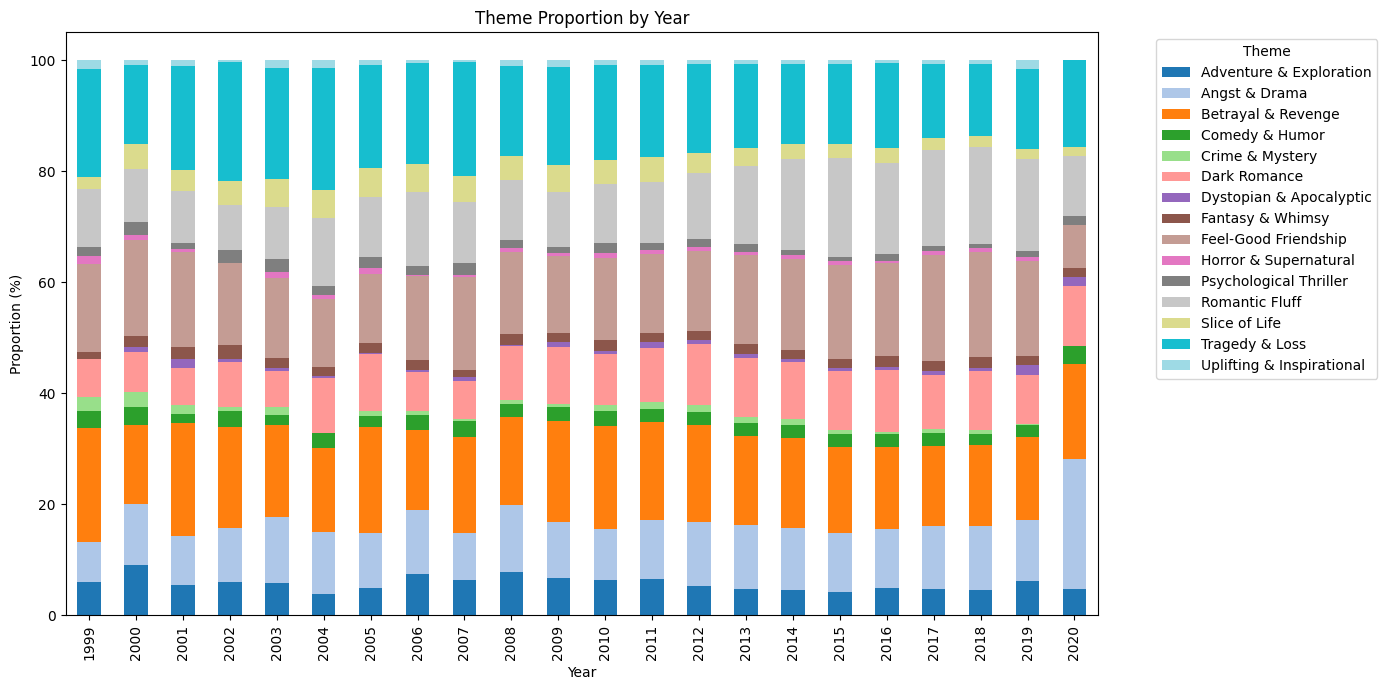

<Figure size 640x480 with 0 Axes>

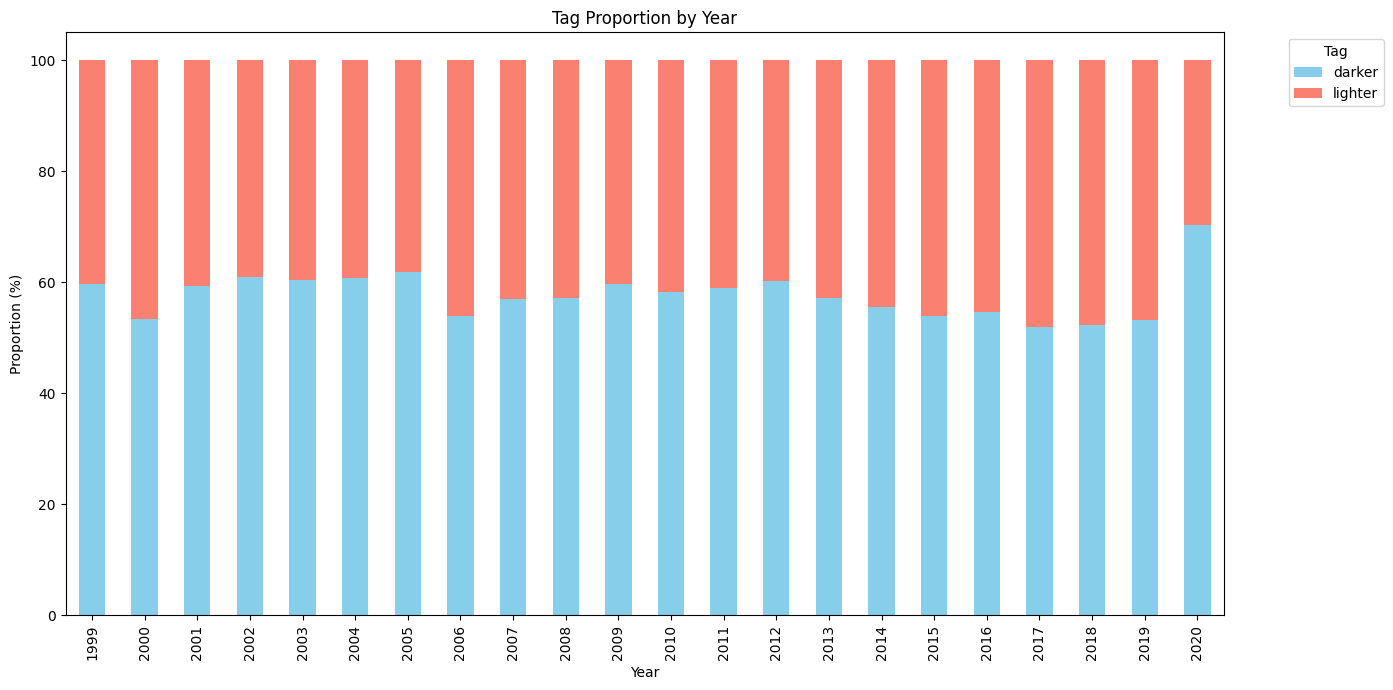

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
theme_proportion = df.groupby(['year', 'theme']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack(fill_value=0)
tag_proportion = df.groupby(['year', 'tag']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack(fill_value=0)

# Visualizing Theme Proportion by Year
theme_proportion.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')
plt.title('Theme Proportion by Year')
plt.xlabel('Year')
plt.ylabel('Proportion (%)')
plt.legend(title='Theme', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Visualizing Tag Proportion by Year
plt.figure()
tag_proportion.plot(kind='bar', stacked=True, figsize=(14, 7), color=['skyblue', 'salmon'])
plt.title('Tag Proportion by Year')
plt.xlabel('Year')
plt.ylabel('Proportion (%)')
plt.legend(title='Tag', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

In [ ]:
# Filter for 'darker' tags and aggregate hits by year
darker_hits_by_year = df[df['tag'] == 'darker'].groupby('year')['hits'].sum()

# Aggregate total hits by year for comparison
total_hits_by_year = df.groupby('year')['hits'].sum()

# Calculate the proportion of hits for darker themes by year
darker_theme_proportion = (darker_hits_by_year / total_hits_by_year).reset_index(name='darker_hit_proportion')

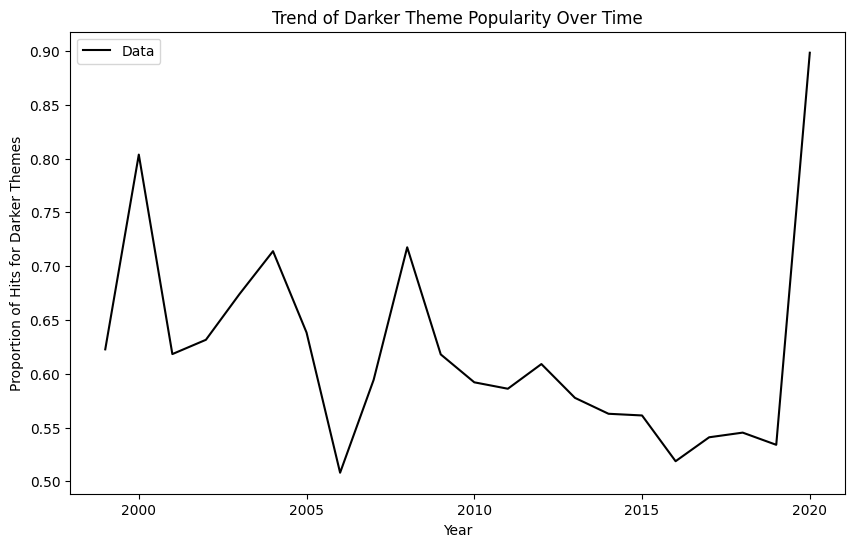

In [ ]:
# Linear Regression Analysis
X = sm.add_constant(darker_theme_proportion['year'])
y = darker_theme_proportion['darker_hit_proportion']
model = sm.OLS(y, X).fit()

# Predictions for plotting
predictions = model.predict(X)

# Plotting the original data and the regression line
plt.figure(figsize=(10, 6))
plt.plot(darker_theme_proportion['year'], darker_theme_proportion['darker_hit_proportion'], color='black', label='Data')
plt.xlabel('Year')
plt.ylabel('Proportion of Hits for Darker Themes')
plt.title('Trend of Darker Theme Popularity Over Time')
plt.legend()
plt.show()

In [ ]:
df['is_darker'] = df['tag'] == 'darker'

# Aggregate data
aggregated_data = df.groupby(['year', 'is_darker']).agg(
    total_hits=('hits', 'sum'),
    story_count=('hits', 'count')
).reset_index()

# Calculate normalized hit rate
aggregated_data['normalized_hit_rate'] = aggregated_data['total_hits'] / aggregated_data['story_count']

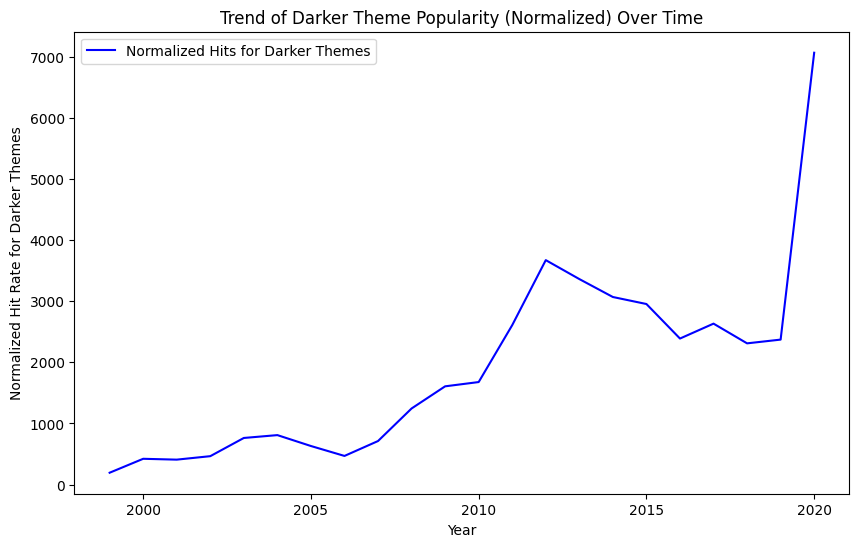

In [ ]:
# Filter for darker themes
darker_data = aggregated_data[aggregated_data['is_darker']]

# Regression
X = sm.add_constant(darker_data['year'])
y = darker_data['normalized_hit_rate']
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(darker_data['year'], darker_data['normalized_hit_rate'], color='blue', label='Normalized Hits for Darker Themes')
plt.xlabel('Year')
plt.ylabel('Normalized Hit Rate for Darker Themes')
plt.title('Trend of Darker Theme Popularity (Normalized) Over Time')
plt.legend()
plt.show()

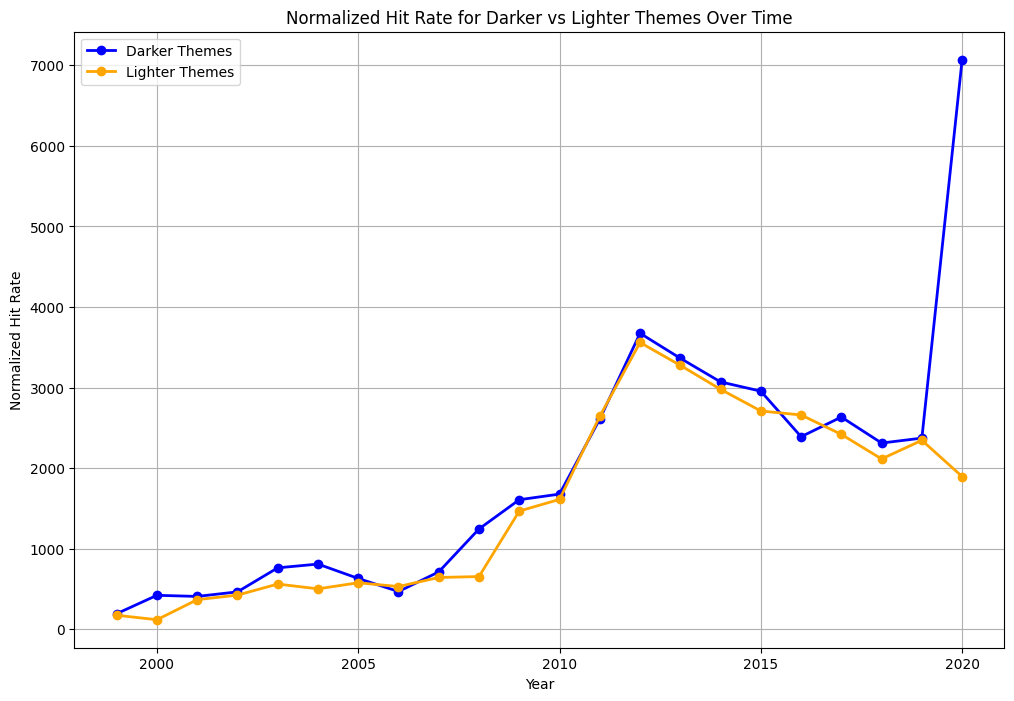

In [ ]:
# Plot the normalized hit rate for darker and lighter themes over time
plt.figure(figsize=(12, 8))

# Darker Themes
plt.plot(
    'year',
    'normalized_hit_rate',
    data=aggregated_data[aggregated_data['is_darker'] == True],
    marker='o',
    color='blue',
    linewidth=2,
    label='Darker Themes'
)

# Lighter Themes
plt.plot(
    'year',
    'normalized_hit_rate',
    data=aggregated_data[aggregated_data['is_darker'] == False],
    marker='o',
    color='orange',
    linewidth=2,
    label='Lighter Themes'
)

plt.title('Normalized Hit Rate for Darker vs Lighter Themes Over Time')
plt.xlabel('Year')
plt.ylabel('Normalized Hit Rate')
plt.legend()
plt.grid(True)
plt.show()

# Embedding Analysis

In [ ]:
!cp /content/drive/MyDrive/all_embedding.zip /content

In [ ]:
%cd /content
!unzip all_embedding.zip

/content
Archive:  all_embedding.zip
  inflating: content/drive/MyDrive/all_embedding.json  


In [ ]:
import pandas as pd
import json

df['id'] = df['id'].astype('str')
# Load JSON file into a dictionary
with open('/content/content/drive/MyDrive/all_embedding.json', 'r') as f:
    json_data = json.load(f)

df['embedding'] = df['id'].map(json_data)
df.head()

,id,processDate,rating,finished,title,description,curChapters,maxChapters,language,words,...,date,restricted,headerScrapedFrom,contentScrapedFrom,hidden,theme,year,tag,is_darker,embedding
0,42,2020-07-29 21:38:01,-1,1,You can't put back a petal when it falls from ...,Cristina gets a haircut. Meredith gets a revel...,1,1,1,2578,...,2008-07-14,0,26262435,26262435,0,Slice of Life,2008,lighter,False,"[-0.00807625986635685, -0.005471497308462858, ..."
1,63,2020-07-29 21:35:52,2,1,The Education of Rodney McKay,Sometimes life just seemed to happen to Rodney...,1,1,1,2260,...,2008-09-16,0,26262449,26262449,0,Tragedy & Loss,2008,darker,True,"[-0.020068569108843803, 0.006438391283154488, ..."
2,84,2020-07-29 21:38:01,0,1,Black Pearl,Black pearls are rare and precious—sometimes e...,1,1,1,1145,...,2008-09-16,0,26262466,26262466,0,Tragedy & Loss,2008,darker,True,NaN
3,168,2020-07-29 21:38:02,0,1,Ring Out the Bells (The Fatherland Remix),"She was flushed from exertion, a riot of tangl...",1,1,1,797,...,2008-09-17,0,26262511,26262511,0,Romantic Fluff,2008,lighter,False,"[-0.010487895458936691, -0.011474157683551311,..."
4,210,2020-07-29 21:38:02,1,1,Things to Come,"""How the hell did you get in here?"" Matt asked...",1,1,1,1911,...,2008-09-17,0,26262536,26262536,0,Betrayal & Revenge,2008,darker,True,"[-0.023059487342834473, 0.003994512837380171, ..."


In [ ]:
# prompt: df = df.dropna(['embedding'])
df = df.dropna(subset=['embedding'])

In [ ]:
df['embedding'].isna().sum()

0

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# Drop rows where the year is smaller than 1999
df = df[df['year'] >= 1999]

In [ ]:
df.shape

(207850, 24)

In [ ]:
df.head()

,id,processDate,rating,finished,title,description,curChapters,maxChapters,language,words,...,date,restricted,headerScrapedFrom,contentScrapedFrom,hidden,theme,year,tag,is_darker,embedding
0,42,2020-07-29 21:38:01,-1,1,You can't put back a petal when it falls from ...,Cristina gets a haircut. Meredith gets a revel...,1,1,1,2578,...,2008-07-14,0,26262435,26262435,0,Slice of Life,2008,lighter,False,"[-0.00807625986635685, -0.005471497308462858, ..."
1,63,2020-07-29 21:35:52,2,1,The Education of Rodney McKay,Sometimes life just seemed to happen to Rodney...,1,1,1,2260,...,2008-09-16,0,26262449,26262449,0,Tragedy & Loss,2008,darker,True,"[-0.020068569108843803, 0.006438391283154488, ..."
3,168,2020-07-29 21:38:02,0,1,Ring Out the Bells (The Fatherland Remix),"She was flushed from exertion, a riot of tangl...",1,1,1,797,...,2008-09-17,0,26262511,26262511,0,Romantic Fluff,2008,lighter,False,"[-0.010487895458936691, -0.011474157683551311,..."
4,210,2020-07-29 21:38:02,1,1,Things to Come,"""How the hell did you get in here?"" Matt asked...",1,1,1,1911,...,2008-09-17,0,26262536,26262536,0,Betrayal & Revenge,2008,darker,True,"[-0.023059487342834473, 0.003994512837380171, ..."
5,252,2020-07-29 21:38:02,1,1,Childhood Treasures,"""She isn't quite sure what they're waiting for...",1,1,1,1094,...,2005-12-15,0,26262573,26262573,0,Tragedy & Loss,2005,darker,True,"[0.011301171965897083, 0.00845534261316061, 0...."


In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Ensure the embeddings are in the correct format (list of lists or 2D numpy array)
embeddings_list = df['embedding'].tolist()
embeddings_array = np.array(embeddings_list)

# Initialize PCA
pca = PCA(n_components=200)

embeddings_pca = pca.fit_transform(embeddings_array)
df['embedding_PCA'] = list(embeddings_pca)

df.head()

,id,processDate,rating,finished,title,description,curChapters,maxChapters,language,words,...,restricted,headerScrapedFrom,contentScrapedFrom,hidden,theme,year,tag,is_darker,embedding,embedding_PCA
0,42,2020-07-29 21:38:01,-1,1,You can't put back a petal when it falls from ...,Cristina gets a haircut. Meredith gets a revel...,1,1,1,2578,...,0,26262435,26262435,0,Slice of Life,2008,lighter,False,"[-0.00807625986635685, -0.005471497308462858, ...","[-0.11409246481815372, 0.03218638834258594]"
1,63,2020-07-29 21:35:52,2,1,The Education of Rodney McKay,Sometimes life just seemed to happen to Rodney...,1,1,1,2260,...,0,26262449,26262449,0,Tragedy & Loss,2008,darker,True,"[-0.020068569108843803, 0.006438391283154488, ...","[-0.04403438532283093, -0.06403260908896673]"
3,168,2020-07-29 21:38:02,0,1,Ring Out the Bells (The Fatherland Remix),"She was flushed from exertion, a riot of tangl...",1,1,1,797,...,0,26262511,26262511,0,Romantic Fluff,2008,lighter,False,"[-0.010487895458936691, -0.011474157683551311,...","[-0.06041290516586452, 0.0510247906679237]"
4,210,2020-07-29 21:38:02,1,1,Things to Come,"""How the hell did you get in here?"" Matt asked...",1,1,1,1911,...,0,26262536,26262536,0,Betrayal & Revenge,2008,darker,True,"[-0.023059487342834473, 0.003994512837380171, ...","[-0.172681014257591, -0.004273752532121985]"
5,252,2020-07-29 21:38:02,1,1,Childhood Treasures,"""She isn't quite sure what they're waiting for...",1,1,1,1094,...,0,26262573,26262573,0,Tragedy & Loss,2005,darker,True,"[0.011301171965897083, 0.00845534261316061, 0....","[-0.138602422631046, -0.14001229723171513]"


In [ ]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex

embeddings = np.vstack(df['embedding_PCA'].values)  # This combines all embedding lists into a 2D array
tsne_results = embeddings
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(embeddings)

# Processing years for colors:
years = df['year'].values
unique_years = np.unique(years)
color_map = plt.get_cmap('viridis', len(unique_years))
year_to_color = {year: to_hex(color_map(i)) for i, year in enumerate(unique_years)}
colors_by_year = [year_to_color[year] for year in years]

# Processing tags for colors:
tag_colors = {'lighter': 'blue', 'darker': 'red'}
colors_by_tag = df['tag'].map(tag_colors)

<ipython-input-56-65c2154ecb05>:4: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=df['year'].min(), vmax=df['year'].max())))


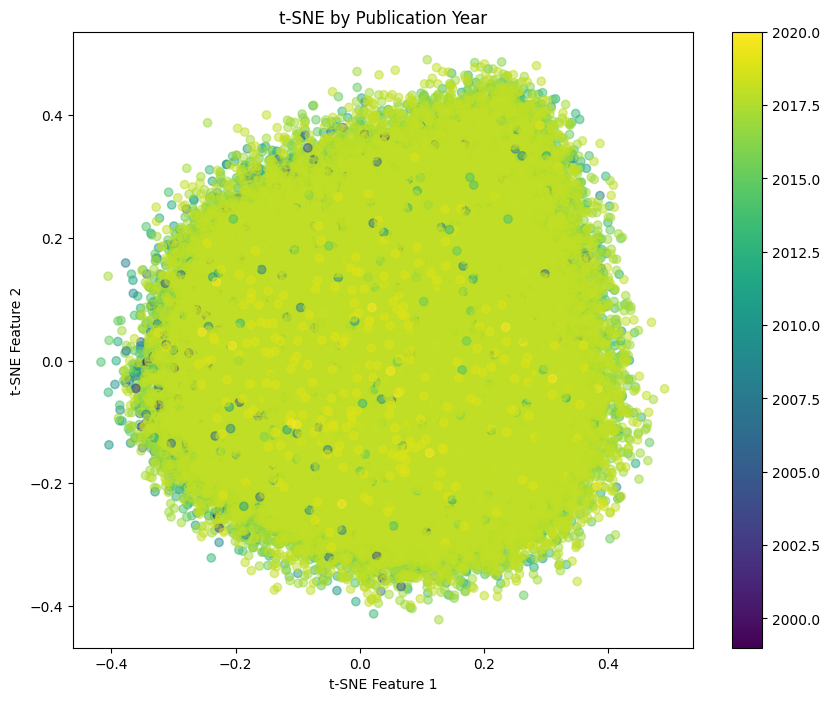

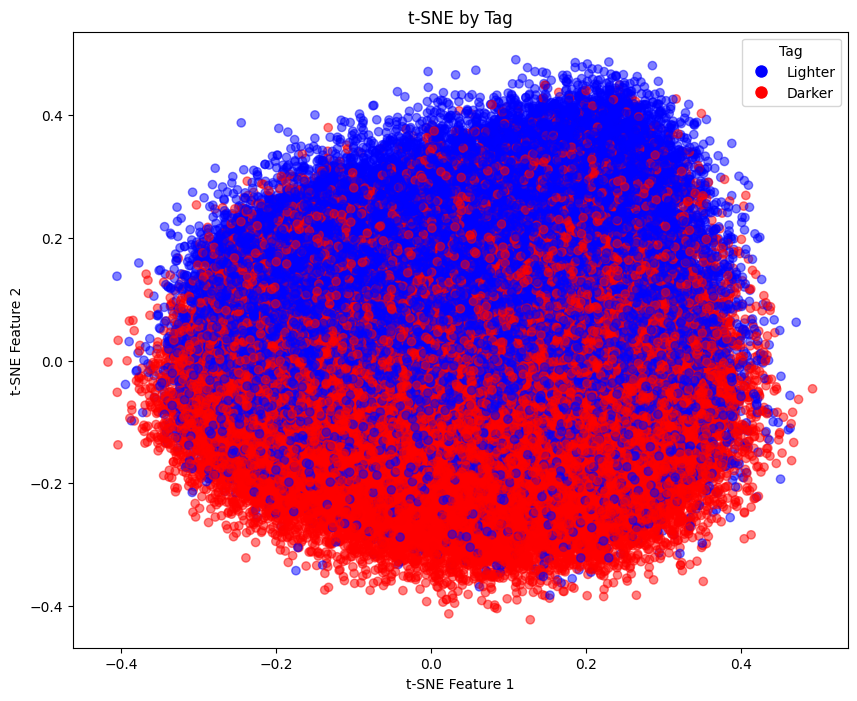

In [ ]:
# Visualization by Year
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=colors_by_year, alpha=0.5)
plt.colorbar(plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=df['year'].min(), vmax=df['year'].max())))
plt.title('t-SNE by Publication Year')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()

# Visualization by Tag
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=colors_by_tag, alpha=0.5)
plt.title('t-SNE by Tag')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')

plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='Lighter', markerfacecolor='blue', markersize=10),
          plt.Line2D([0], [0], marker='o', color='w', label='Darker', markerfacecolor='red', markersize=10)],
          title='Tag')
plt.show()

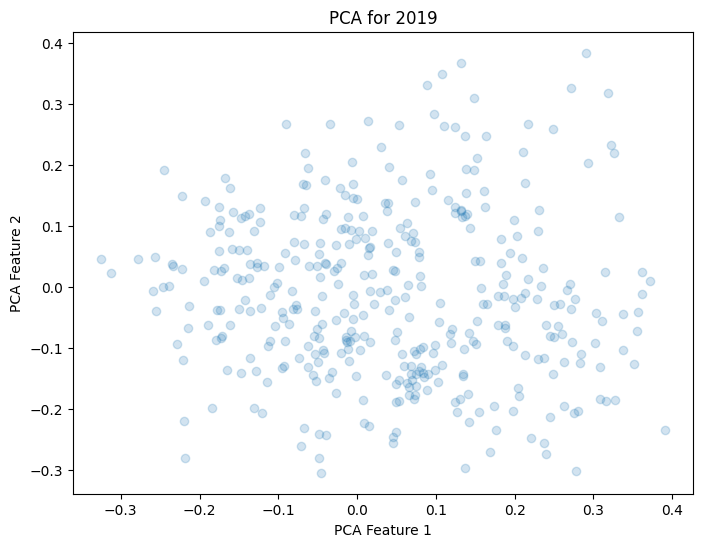

In [ ]:
import matplotlib.pyplot as plt

# Function to visualize embeddings for a specified year
def visualize_embeddings_for_year(df, year, figsize=(8, 6)):
    # Filter the dataframe for the specified year
    year_df = df[df['year'] == year]

    # Extract the 2D PCA embeddings
    year_embeddings = np.stack(year_df['embedding_PCA'].values)

    if len(year_embeddings) > 1:
        tsne_results = compute_tsne(year_embeddings)
    # Plot only if there are enough samples for that year
    if len(year_embeddings) > 0:
        plt.figure(figsize=figsize)
        plt.scatter(year_embeddings[:, 0], year_embeddings[:, 1], alpha=0.2)
        plt.title(f'PCA for {year}')
        plt.xlabel('PCA Feature 1')
        plt.ylabel('PCA Feature 2')
        plt.show()
    else:
        print(f'No data available for year {year}')

visualize_embeddings_for_year(df, 2019)

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np


def visualize_embeddings_for_year_tsne(df, year, figsize=(8, 6), perplexity=30, n_iter=1000):
    year_df = df[df['year'] == year]
    embeddings = np.stack(year_df['embedding'].values)

    if len(embeddings) > 0:
        tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=n_iter)
        year_embeddings_tsne = tsne.fit_transform(embeddings)

        plt.figure(figsize=figsize)
        plt.scatter(year_embeddings_tsne[:, 0], year_embeddings_tsne[:, 1], alpha=0.7)
        plt.title(f't-SNE for {year}')
        plt.xlabel('t-SNE Feature 1')
        plt.ylabel('t-SNE Feature 2')
        plt.show()
    else:
        print(f'No data available for year {year}')


visualize_embeddings_for_year_tsne(df, 2019)